# K-means

In [222]:
# магическая функция для отображения графиков в блокноте
%matplotlib inline
import matplotlib.pyplot as plt # визуализация
import random 
import seaborn as sns; sns.set()  # стилизация графиков
import numpy as np # массивы
from sklearn.datasets.samples_generator import make_blobs # генерация изотропных гауссовых облаков 
from sklearn.cluster import KMeans 
from sklearn import metrics
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN

## Собственная реализация
При создании модели надо выбрать между евклидовой и манхеттенской метрикой

In [15]:
'''
при инициализации классу нужно задать количество кластеров
fit(X, num_fit_x, max_iter, rseed) - функция обучения по объектам 
    X - набор входных объектов X, num_fit_x - длина батча, т.е. количество данных для обучения за одну итерацию,
    max_iter - максимальное кол-во итераций обучения, rseed - параметр для рандома.
predict(X) - предсказание значения меток для объектов Х
'''
class k_means:
    def __init__(self, n_clusters, dist = 0):
        self.n_clusters = n_clusters
        self.centers = np.zeros(n_clusters)
        self.dist = dist
        #dist = 0 - евклидово, 1 - манхеттенская метрика
    def fit(self, X , num_fit_x, max_iter = 100, rseed = 1):
        '''
        заведем массив меток self.labels, изначально все объекты принадлежат нулевому классу
        случайно расставим self.n_clusters центров, 
        поместим в self.centers (self.centers[i][0] первая координата, self.centers[i][1] - вторая)
        '''
        self.labels = np.zeros(len(X))
        rng = np.random.RandomState(rseed)
        i = rng.permutation(X.shape[0])[:self.n_clusters]
        self.centers = X[i]
        iterat = 0
        for i in range(1):
            iterat += 1
            # создаем рандомный массив num_fit_x разных номеров элементов из X - батч
            batch = random.sample(range(len(X)), num_fit_x)
            '''
            принимаем за меньшее расстояние расстояние до центра нулевого класса
            вычисляем расстояния до остальных центров 
            и если оно меньшее, запоминаем, что объект принадлежит классу этого центра
            '''
            for ind in batch:
                if self.dist == 0:
                    min = ((X[ind][0]-self.centers[0][0])**2 + (X[ind][1]-self.centers[0][1])**2)**(1/2)
                    for clus in range(1, self.n_clusters):
                        if ((X[ind][0]-self.centers[clus][0])**2 + (X[ind][1]-self.centers[clus][1])**2)**(1/2) < min:
                            min = ((X[ind][0]-self.centers[clus][0])**2 + (X[ind][1]-self.centers[clus][1])**2)**(1/2)
                            self.labels[ind] = int(clus)
                else:
                    min = abs(X[ind][0]-self.centers[0][0]) + abs(X[ind][1]-self.centers[0][1])
                    for clus in range(1, self.n_clusters):
                        if abs(X[ind][0]-self.centers[clus][0]) + abs(X[ind][1]-self.centers[clus][1]) < min:
                            min = abs(X[ind][0]-self.centers[clus][0]) + abs(X[ind][1]-self.centers[clus][1])
                            self.labels[ind] = int(clus)
                        
#             # пересчитываем центры согласно новому распределению объектов 
            new_centers = np.array([X[self.labels == i].mean(0) for i in range(self.n_clusters)])

#             # заканчиваем цикл в случае, если центры не сместились 
#             # или количество итераций достигло максимального 
            if np.all(self.centers == new_centers) or iterat == max_iter:
                break
            self.centers = new_centers
            self.labels =  self.predict(X)
        
    def predict(self, X):
        '''
        все объекты относим к нулевому классу
        для каждого объекта принимаем за меньшее расстояние 
        расстояние до центра нулевого класса.
        вычисляем расстояния до остальных центров 
        и если оно меньшее, запоминаем, что объект принадлежит классу этого центра
        '''
        ans = np.zeros(len(X))
        for ind in range(len(X)):
            if self.dist == 0:
                min = ((X[ind][0]-self.centers[0][0])**2 + (X[ind][1]-self.centers[0][1])**2)**(1/2)
                for clus in range(1, self.n_clusters):
                    if ((X[ind][0]-self.centers[clus][0])**2 + (X[ind][1]-self.centers[clus][1])**2)**(1/2) < min:
                        min = ((X[ind][0]-self.centers[clus][0])**2 + (X[ind][1]-self.centers[clus][1])**2)**(1/2)
                        ans[ind] = int(clus)
            else:
                min = abs(X[ind][0]-self.centers[0][0]) + abs(X[ind][1]-self.centers[0][1])
                for clus in range(1, self.n_clusters):
                    if abs(X[ind][0]-self.centers[clus][0]) + abs(X[ind][1]-self.centers[clus][1]) < min:
                        min = abs(X[ind][0]-self.centers[clus][0]) + abs(X[ind][1]-self.centers[clus][1])
                        ans[ind] = int(clus)
        plt.scatter(X[:, 0], X[:, 1], c=ans, s=50, cmap='viridis')
        return ans
    def labels(self):
        return list(self.labels)

### линейно разделимые множества (с расстоянием между группами в 10^3 раз больше, чем диаметр группы)

In [66]:
yAll = []
y_trueAll = []
XAll = []

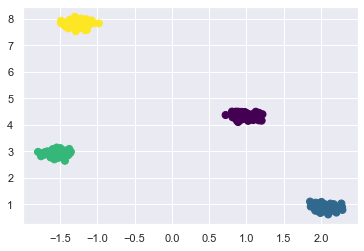

In [67]:
# сгенерируем 4 класса по 300 объектов
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()
y_trueAll.append(y_true) 
XAll.append(X)

### Пример кластеризации из библиотеки
- метод к средних
- евклидово расстояние
- указываем, что будет 4 кластера

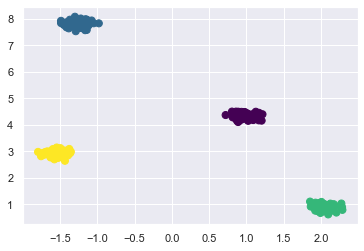

In [68]:
'''
заводим кластеризатор KMeans из sklearn'a, обучаем его и кластеризуем
отрисовывааем что получилось
'''
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.show()

### Пример собственной реализации кластеризации 
- метод к средних
- евклидово расстояние
- указываем, что будет 4 кластера

количество объектов 300, размер батча 50


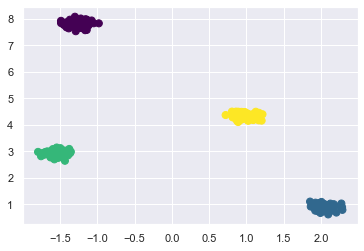

In [72]:
means = k_means(4, 0)
b =  50
print(f"количество объектов {len(X)}, размер батча {b}")
means.fit(X, b, 100, 1)

In [73]:
yAll.append(means.labels)

### Пример собственной реализации кластеризации 
- метод к средних
- манхеттенская метрика
- указываем, что будет 4 кластера

количество объектов 300, размер батча 35


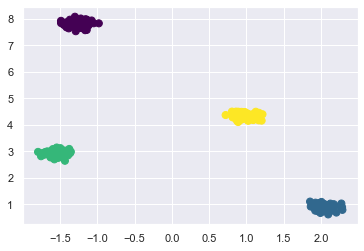

In [74]:
means = k_means(4, 1)
b =  35
print(f"количество объектов {len(X)}, размер батча {b}")
means.fit(X, b, 100, 1)

In [75]:
yAll.append(means.labels)

### линейно разделимые множества (группы расположены близко или касаются друг друга)


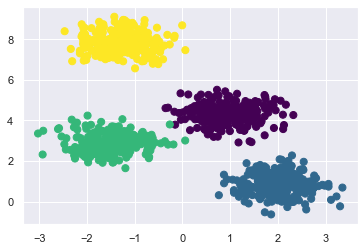

In [76]:
# сгенерируем 4 класса по 1000 объектов
X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()
y_trueAll.append(y_true) 
XAll.append(X)

количество объетов 1000, размер батча 130


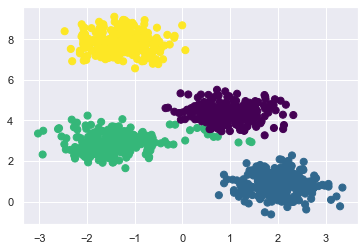

In [85]:
means = k_means(4, 0)
b = 130
print(f"количество объетов {len(X)}, размер батча {b}")
means.fit(X, b, 500, 1)

In [86]:
yAll.append(means.labels)

количество объетов 1000, размер батча 30


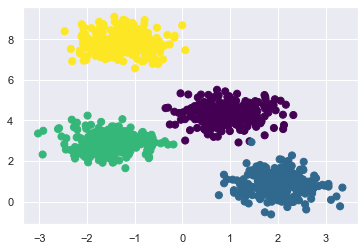

In [88]:
means = k_means(4, 1)
b = 30
print(f"количество объетов {len(X)}, размер батча {b}")
means.fit(X, b, 700, 1)

In [89]:
yAll.append(means.labels)

### линейно неразделимое множество (средняя площадь пересечения классов 10-20%)

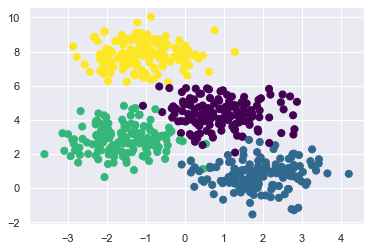

In [90]:
# сгенерируем 4 класса по 600 объектов
X, y_true = make_blobs(n_samples=600, centers=4,
                       cluster_std=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()
y_trueAll.append(y_true) 
XAll.append(X)

количество объетов 600, размер батча 255


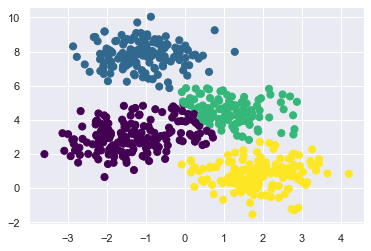

In [99]:
means = k_means(4, 0)
b =  255
print(f"количество объетов {len(X)}, размер батча {b}")
means.fit(X, b, 200, 1)

In [94]:
yAll.append(means.labels)

количество объетов 600, размер батча 300


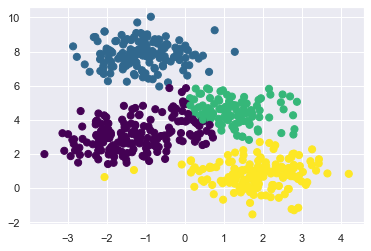

In [103]:
means = k_means(4, 1)
b =  300
print(f"количество объетов {len(X)}, размер батча {b}")
means.fit(X, b, 400, 1)

In [104]:
yAll.append(means.labels)

### линейно неразделимое множество (средняя площадь пересечения классов 50-70%)

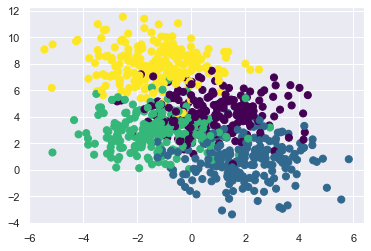

In [105]:
# сгенерируем 4 класса по 1000 объектов
X, y_true = make_blobs(n_samples=800, centers=4,
                       cluster_std=1.4, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()
y_trueAll.append(y_true) 
XAll.append(X)

количество объетов 800, размер батча 70


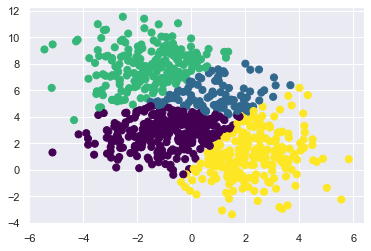

In [106]:
means = k_means(4, 0)
b =  70
print(f"количество объетов {len(X)}, размер батча {b}")
means.fit(X, b, 400, 1)

In [107]:
yAll.append(means.labels)

количество объетов 800, размер батча 300


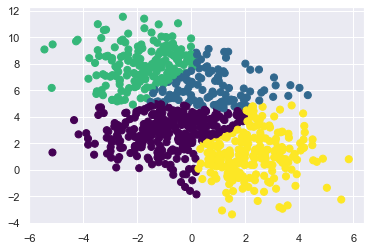

In [109]:
means = k_means(4, 1)
b =  300
print(f"количество объетов {len(X)}, размер батча {b}")
means.fit(X, b, 400, 1)

In [110]:
yAll.append(means.labels)

# Метрики качества

In [144]:
def calcMetr(yAll, y_trueAll, XAll):
    data = []
    for idx in range(8):
        ind = int(idx/2)
        data.append(({
            'ARI': metrics.adjusted_rand_score(y_trueAll[ind], yAll[idx]),
            'AMI': metrics.adjusted_mutual_info_score(y_trueAll[ind], yAll[idx]),
            'Homogenity': metrics.homogeneity_score(y_trueAll[ind], yAll[idx]),
            'Completeness': metrics.completeness_score(y_trueAll[ind], yAll[idx]),
            'V-measure': metrics.v_measure_score(y_trueAll[ind], yAll[idx]),
            'Silhouette': metrics.silhouette_score(XAll[ind], yAll[idx])}))
        print()

    results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                               'Completeness', 'V-measure', 
                                               'Silhouette'],
                           index=['10^3, евклид', '10^3, манхет', 
                                  'близко, евклид', 'близко, манхет', 
                                  '10-20%, евклид', '10-20%, манхет', 
                                  '50-70%, евклид', '50-70%, манхет'])

    return results

In [147]:
calcMetr(yAll, y_trueAll, XAll)

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
"10^3, евклид",1.000000,1.000000,1.000000,1.000000,1.000000,0.946547
"10^3, манхет",1.000000,1.000000,1.000000,1.000000,1.000000,0.946547
"близко, евклид",0.966148,0.962772,0.962658,0.963128,0.962893,0.715725
"близко, манхет",0.992013,0.986847,0.986886,0.986894,0.986890,0.731045
"10-20%, евклид",0.781626,0.823350,0.814540,0.834347,0.824324,0.521733
"10-20%, манхет",0.810711,0.835789,0.830788,0.842676,0.836690,0.533406
"50-70%, евклид",0.513928,0.521316,0.515122,0.531743,0.523301,0.336817
"50-70%, манхет",0.457665,0.497753,0.489783,0.510330,0.499845,0.327733


# Иерархический метод - Агломеративная кластеризация

### линейно разделимые множества (с расстоянием между группами в 10^3 раз больше, чем диаметр группы)

In [148]:
yAll = []
y_trueAll = []
XAll = []

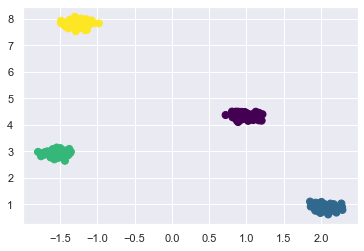

In [149]:
# сгенерируем 4 класса по 300 объектов
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()
y_trueAll.append(y_true) 
XAll.append(X)

- агломеративная кластеризация
- евклидово расстояние

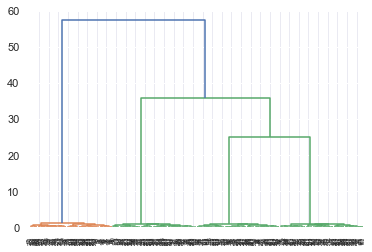

In [164]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

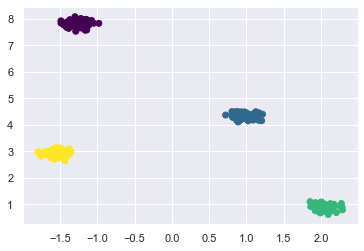

In [166]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(X)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [167]:
yAll.append(labels)

- агломеративная кластеризация
- манхеттенская метрика

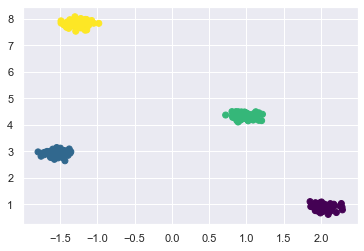

In [169]:
model = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='complete')
model.fit(X)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [170]:
yAll.append(labels)

### линейно разделимые множества (группы расположены близко или касаются друг друга)


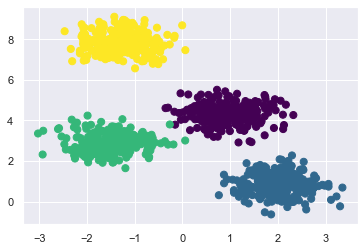

In [171]:
# сгенерируем 4 класса по 1000 объектов
X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()
y_trueAll.append(y_true) 
XAll.append(X)

- агломеративная кластеризация
- евклидово расстояние

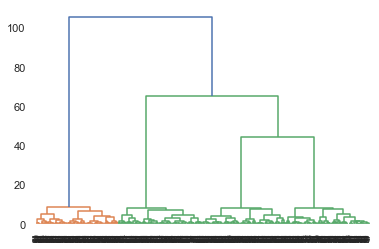

In [172]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

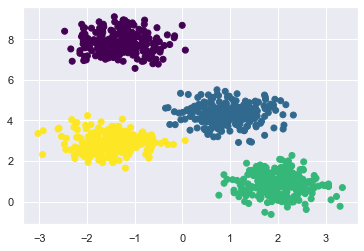

In [173]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(X)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [174]:
yAll.append(labels)

- агломеративная кластеризация
- манхеттенская метрика

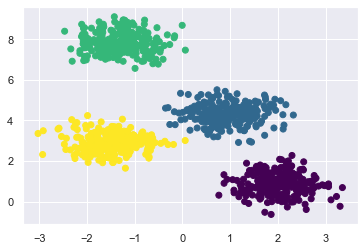

In [175]:
model = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='complete')
model.fit(X)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [176]:
yAll.append(labels)

### линейно неразделимое множество (средняя площадь пересечения классов 10-20%)

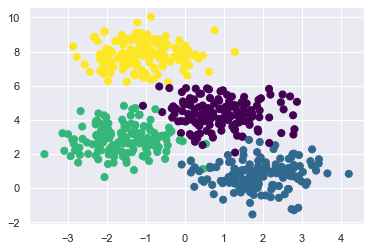

In [177]:
# сгенерируем 4 класса по 600 объектов
X, y_true = make_blobs(n_samples=600, centers=4,
                       cluster_std=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()
y_trueAll.append(y_true) 
XAll.append(X)

- агломеративная кластеризация
- евклидово расстояние

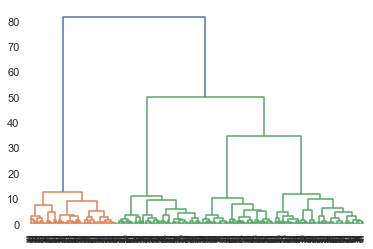

In [178]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

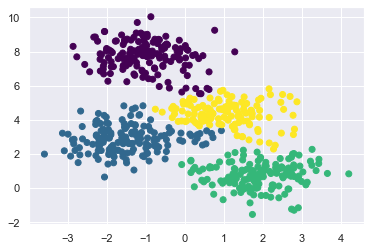

In [179]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(X)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [180]:
yAll.append(labels)

- агломеративная кластеризация
- манхеттенская метрика

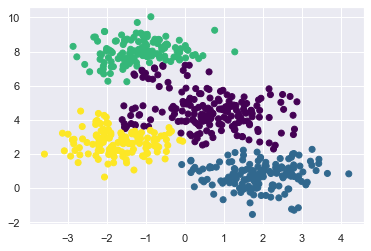

In [181]:
model = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='complete')
model.fit(X)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [182]:
yAll.append(labels)

### линейно неразделимое множество (средняя площадь пересечения классов 50-70%)

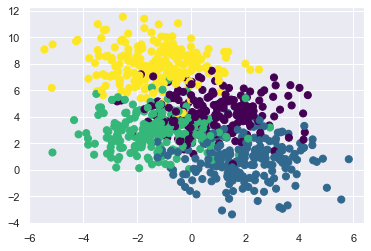

In [183]:
# сгенерируем 4 класса по 1000 объектов
X, y_true = make_blobs(n_samples=800, centers=4,
                       cluster_std=1.4, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()
y_trueAll.append(y_true) 
XAll.append(X)

- агломеративная кластеризация
- евклидово расстояние

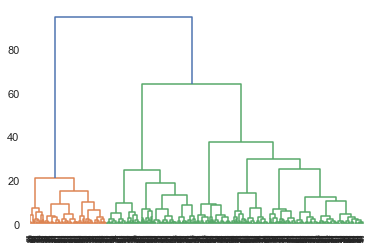

In [184]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

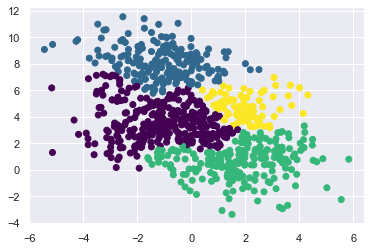

In [185]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(X)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [186]:
yAll.append(labels)

- агломеративная кластеризация
- манхеттенская метрика

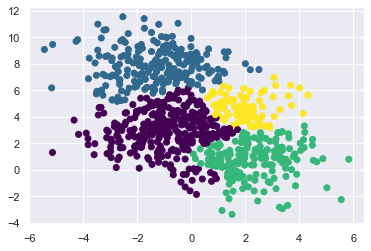

In [187]:
model = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='complete')
model.fit(X)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [188]:
yAll.append(labels)

In [189]:
print(len(yAll))
print(len(y_trueAll))

8
4


### Метрики качества для агломеративной кластеризации

In [190]:
calcMetr(yAll, y_trueAll, XAll)

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
"10^3, евклид",1.000000,1.000000,1.000000,1.000000,1.000000,0.946547
"10^3, манхет",1.000000,1.000000,1.000000,1.000000,1.000000,0.946547
"близко, евклид",0.997331,0.995280,0.995294,0.995297,0.995296,0.731763
"близко, манхет",0.997331,0.995280,0.995294,0.995297,0.995296,0.731763
"10-20%, евклид",0.874764,0.855777,0.855678,0.857452,0.856564,0.558843
"10-20%, манхет",0.805565,0.814423,0.811539,0.819378,0.815440,0.518555
"50-70%, евклид",0.480675,0.513752,0.499246,0.533498,0.515804,0.342412
"50-70%, манхет",0.491695,0.526207,0.510135,0.547616,0.528211,0.361615


# DBSCAN

### линейно разделимые множества (с расстоянием между группами в 10^3 раз больше, чем диаметр группы)

In [376]:
yAll = []
y_trueAll = []
XAll = []

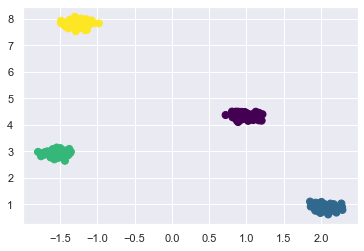

In [377]:
# сгенерируем 4 класса по 300 объектов
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()
y_trueAll.append(y_true) 
XAll.append(X)

- DBSCAN
- евклидово расстояние

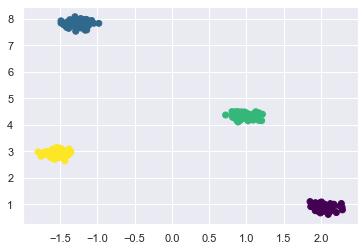

In [378]:
model = clustering = DBSCAN(eps=1, min_samples=2).fit(X)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [379]:
yAll.append(labels)

- DBSCAN
- манхеттенская метрика

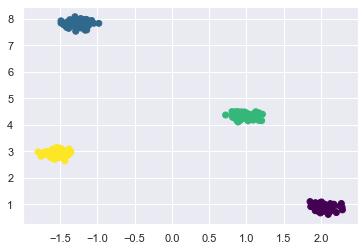

In [380]:
X_precomputed = pairwise_distances(X, metric='manhattan')
model = DBSCAN(eps=3, metric='precomputed').fit(X_precomputed)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()

In [381]:
yAll.append(labels)

### линейно разделимые множества (группы расположены близко или касаются друг друга)


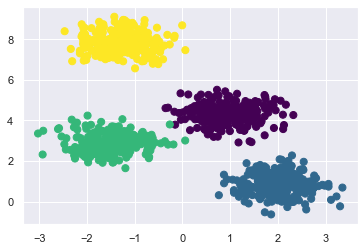

In [382]:
# сгенерируем 4 класса по 1000 объектов
X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()
y_trueAll.append(y_true) 
XAll.append(X)

- DBSCAN
- евклидово расстояние

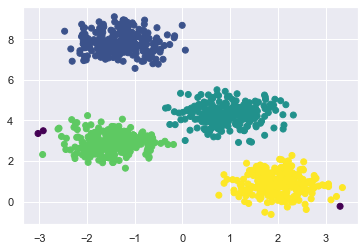

In [383]:
model = clustering = DBSCAN(eps=0.59, min_samples=20).fit(X)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [384]:
yAll.append(labels)

- DBSCAN
- манхеттенская метрика

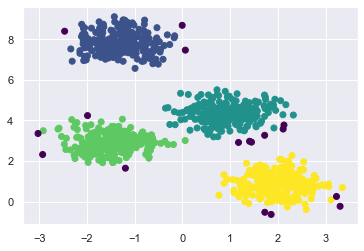

In [385]:
X_precomputed = pairwise_distances(X, metric='manhattan')
model = DBSCAN(eps=0.5, metric='precomputed').fit(X_precomputed)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()

In [386]:
yAll.append(labels)

### линейно неразделимое множество (средняя площадь пересечения классов 10-20%)

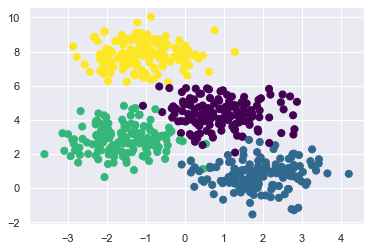

In [387]:
# сгенерируем 4 класса по 600 объектов
X, y_true = make_blobs(n_samples=600, centers=4,
                       cluster_std=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()
y_trueAll.append(y_true) 
XAll.append(X)

- DBSCAN
- евклидово расстояние

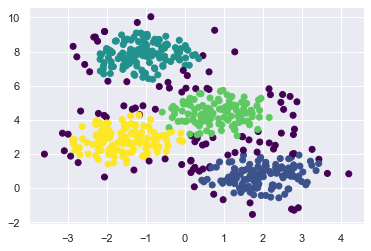

In [388]:
model = clustering = DBSCAN(eps=0.6, min_samples=20).fit(X)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [389]:
yAll.append(labels)

- DBSCAN
- манхеттенская метрика

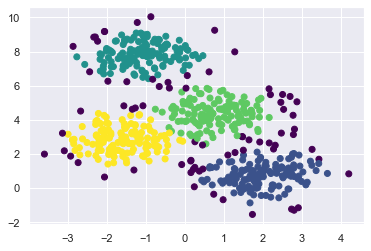

In [390]:
X_precomputed = pairwise_distances(X, metric='manhattan')
model = DBSCAN(eps=0.8, metric='precomputed', min_samples=20).fit(X_precomputed)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()

In [391]:
yAll.append(labels)

### линейно неразделимое множество (средняя площадь пересечения классов 50-70%)

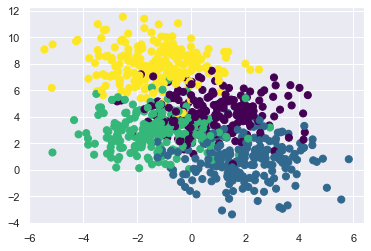

In [392]:
# сгенерируем 4 класса по 1000 объектов
X, y_true = make_blobs(n_samples=800, centers=4,
                       cluster_std=1.4, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()
y_trueAll.append(y_true) 
XAll.append(X)

- DBSCAN
- евклидово расстояние

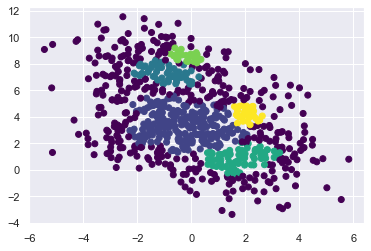

In [393]:
model = clustering = DBSCAN(eps=0.6, min_samples=20).fit(X)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [394]:
yAll.append(labels)

- DBSCAN
- манхеттенская метрика

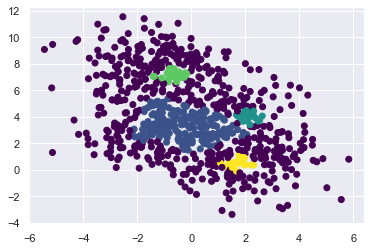

In [395]:
X_precomputed = pairwise_distances(X, metric='manhattan')
model = DBSCAN(eps=0.7, metric='precomputed', min_samples=20).fit(X_precomputed)
labels = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()

In [396]:
yAll.append(labels)

In [397]:
print(len(yAll))
print(len(y_trueAll))

8
4


### Метрики качества для агломеративной кластеризации

In [398]:
calcMetr(yAll, y_trueAll, XAll)

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
"10^3, евклид",1.000000,1.000000,1.000000,1.000000,1.000000,0.946547
"10^3, манхет",1.000000,1.000000,1.000000,1.000000,1.000000,0.946547
"близко, евклид",0.990679,0.984376,0.990208,0.978752,0.984447,0.724485
"близко, манхет",0.974213,0.956922,0.978701,0.936448,0.957108,0.714113
"10-20%, евклид",0.734875,0.759203,0.820942,0.708914,0.760827,0.452767
"10-20%, манхет",0.801256,0.798967,0.858481,0.749560,0.800332,0.488154
"50-70%, евклид",0.129224,0.264095,0.266786,0.271711,0.269226,-0.075710
"50-70%, манхет",0.088157,0.174178,0.149129,0.226266,0.179773,-0.270572
